# Problem Set 3

## Question 1

In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [22]:
# Calculating mean age by occupation
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print("Mean age by occupation:")
print(mean_age_by_occupation)

Mean age by occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [13]:
# calculateing male ratio per occupation
male_ratio = users.groupby('occupation')['gender'].apply(lambda x: (x=='M').sum() / x.count())
male_ratio.sort_values(ascending=False, inplace=True)
print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [8]:
# calculate the minimum and maximum ages for each occupation
age_range = users.groupby('occupation')['age'].agg(['min', 'max'])

print(age_range)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [9]:
# calculate the mean age for each combination of occupation and sex
mean_age = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
# calculate the total count of each occupation
occupation_count = users.groupby('occupation')['gender'].count()

# calculate the count of each gender for each occupation
gender_count = users.groupby(['occupation', 'gender'])['gender'].count()

# calculate the percentage of each gender for each occupation
gender_percentage = (gender_count / occupation_count * 100).round(2)

print(gender_percentage)

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

## Question 2

In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url, sep=',')


print(euro12)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [20]:
# Select only the Goal column
goal_column = euro12['Goals']
print(goal_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [18]:
# Teams participated in the Euro2012
num_teams = len(euro12['Team'].unique())
print("Number of teams in Euro2012:", num_teams)

Number of teams in Euro2012: 16


In [19]:
# Number of columns in the dataset
num_cols = euro12.shape[1]
print("Number of columns:", num_cols)

Number of columns: 35


In [24]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [25]:
# Sorting by cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(discipline)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [26]:
# Mean of Yellow cards per team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team: ", mean_yellow_cards)

Mean Yellow Cards given per Team:  7.4375


In [27]:
# Filter teams that scored more than 6 goals
high_scorers = euro12[euro12['Goals'] > 6]['Team']
print(high_scorers)

5     Germany
13      Spain
Name: Team, dtype: object


In [28]:
# selecting teams that start with G
g_teams = euro12[euro12['Team'].str.startswith('G')]
print(g_teams)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [29]:
# First 7 columns
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [30]:
# All columns except last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [31]:
# Filter data for England, Italy, and Russia
euro12_filtered = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]

# Select only the Team and Shooting Accuracy columns
euro12_filtered[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

In [32]:
import pandas as pd
import numpy as np

# Create Series of random numbers
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Print the first few elements of each series
print("Series 1:")
print(series1.head())
print("\nSeries 2:")
print(series2.head())
print("\nSeries 3:")
print(series3.head())

Series 1:
0    4
1    2
2    3
3    4
4    3
dtype: int32

Series 2:
0    2
1    1
2    1
3    1
4    1
dtype: int32

Series 3:
0    24289
1    23104
2    20432
3    28120
4    13091
dtype: int32


In [36]:
# create the series
s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

# create the DataFrame by joining the series
df = pd.concat([s1, s2, s3], axis=1)

# rename the columns
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]

# display the DataFrame
print(df)

    bedrs  bathrs  price_sqr_meter
0       1       3            22183
1       2       1            11466
2       1       2            10942
3       1       1            12344
4       1       3            18665
..    ...     ...              ...
95      2       1            20131
96      4       2            20648
97      4       3            20904
98      1       2            28631
99      3       3            28161

[100 rows x 3 columns]


In [40]:
# concatenate the 3 Series into one column DataFrame
bigcolumn = pd.concat([s1, s2, s3], axis=0, ignore_index=True)

# print the resulting DataFrame
print(bigcolumn)

0          1
1          2
2          1
3          1
4          1
       ...  
295    20131
296    20648
297    20904
298    28631
299    28161
Length: 300, dtype: int32


## Question 4

In [90]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Import dataset
data = pd.read_csv('wind.txt', sep='\s+')

# Print first 5 rows of resulting dataframe
print(data.head())

   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [91]:
# Create a datetime index from the first three columns
data['date'] = pd.to_datetime((data['Yr']*10000)+19000000 + data['Mo']*100 + data['Dy'], format='%Y%m%d')
data = data.set_index('date')

print(data.head())

            Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA  \
date                                                                            
1961-01-01  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25   
1961-01-02  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   
1961-01-03  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   
1961-01-04  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   
1961-01-05  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54   

              MUL    CLO    BEL    MAL  
date                                    
1961-01-01  10.83  12.58  18.50  15.04  
1961-01-02   9.79   9.67  17.54  13.83  
1961-01-03   8.50   7.67  12.75  12.71  
1961-01-04   5.83   5.88   5.46  10.88  
1961-01-05  10.92  10.34  12.92  11.83  


In [92]:
# Count the number of missing values for each location
missing = data.isnull().sum(axis=0)

# Print the result
print("Number of missing values for each location:")
print(missing)

Number of missing values for each location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [93]:
# Compute the total number of non-missing values
total_non_missing = data.count().sum()

# Print the result
print("Total number of non-missing values: {}".format(total_non_missing))

Total number of non-missing values: 98579


In [94]:
# Calculate the mean windspeed for each location
mean_windspeed = data.mean()

# Calculate the mean windspeed over all locations and times
mean_windspeed_all = mean_windspeed.mean()

# Print the result
print("Mean windspeed over all locations and times: {:.2f}".format(mean_windspeed_all))

Mean windspeed over all locations and times: 14.30


In [98]:
# Calculate the statistics for each location
loc_stats = data.describe()

# Select only the min, max, mean, and std columns
loc_stats = loc_stats.loc[['min', 'max', 'mean', 'std']]

# Print the result
print(loc_stats.head())

             Yr         Mo         Dy        RPT        VAL        ROS  \
min   61.000000   1.000000   1.000000   0.670000   0.210000   1.500000   
max   78.000000  12.000000  31.000000  35.800000  33.370000  33.840000   
mean  69.500304   6.523274  15.728628  12.362987  10.644314  11.660526   
std    5.188131   3.448871   8.800335   5.618413   5.267356   5.008450   

            KIL        SHA        BIR        DUB        CLA        MUL  \
min    0.000000   0.130000   0.000000   0.000000   0.000000   0.000000   
max   28.460000  37.540000  26.160000  30.370000  31.080000  25.880000   
mean   6.306468  10.455834   7.092254   9.797343   8.495053   8.493590   
std    3.605811   4.936125   3.968683   4.977555   4.499449   4.166872   

            CLO        BEL        MAL  
min    0.040000   0.130000   0.670000  
max   28.210000  42.380000  42.540000  
mean   8.707332  13.121007  15.599079  
std    4.503954   5.835037   6.699794  


In [99]:
# Resample the data to a yearly frequency
yearly_data = data.resample('AS').mean()

# Print the result
print(yearly_data.head())

              Yr        Mo         Dy        RPT        VAL        ROS  \
date                                                                     
1961-01-01  61.0  6.526027  15.720548  12.299583  10.351796  11.362369   
1962-01-01  62.0  6.526027  15.720548  12.246923  10.110438  11.732712   
1963-01-01  63.0  6.526027  15.720548  12.813452  10.836986  12.541151   
1964-01-01  64.0  6.513661  15.756831  12.363661  10.920164  12.104372   
1965-01-01  65.0  6.526027  15.720548  12.451370  11.075534  11.848767   

                 KIL        SHA       BIR        DUB        CLA       MUL  \
date                                                                        
1961-01-01  6.958227  10.881763  7.729726   9.733923   8.858788  8.647652   
1962-01-01  6.960440  10.657918  7.393068  11.020712   8.793753  8.316822   
1963-01-01  7.330055  11.724110  8.434712  11.075699  10.336548  8.903589   
1964-01-01  6.787787  11.454481  7.570874  10.259153   9.467350  7.789016   
1965-01-01  6.85846

In [100]:
# Resample the data to a weekly frequency
weekly_data = data.resample('W').mean()

# Print the result
print(weekly_data.head())

              Yr   Mo    Dy        RPT        VAL        ROS        KIL  \
date                                                                      
1961-01-01  61.0  1.0   1.0  15.040000  14.960000  13.170000   9.290000   
1961-01-08  61.0  1.0   5.0  13.541429  11.486667  10.487143   6.417143   
1961-01-15  61.0  1.0  12.0  12.468571   8.967143  11.958571   4.630000   
1961-01-22  61.0  1.0  19.0  13.204286   9.862857  12.982857   6.328571   
1961-01-29  61.0  1.0  26.0  19.880000  16.141429  18.225714  12.720000   

                  SHA        BIR        DUB        CLA        MUL        CLO  \
date                                                                           
1961-01-01        NaN   9.870000  13.670000  10.250000  10.830000  12.580000   
1961-01-08   9.474286   6.435714  11.061429   6.616667   8.434286   8.497143   
1961-01-15   7.351429   5.072857   7.535714   6.820000   5.712857   7.571429   
1961-01-22   8.966667   7.417143   9.257143   7.875714   7.145714   8.1242

In [101]:
# Resample the data to a weekly frequency
weekly_data = data.resample('W', label='left', closed='left').agg(['min', 'max', 'mean', 'std'])

# Slice the resulting DataFrame to get the first 52 weeks
first_52_weeks = weekly_data.loc['1961-01-02':'1961-12-25']

# Print the result
print(first_52_weeks)

            Yr                 Mo                           Dy      ...  \
           min max  mean  std min max       mean       std min max  ...   
date                                                                ...   
1961-01-08  61  61  61.0  0.0   1   1   1.000000  0.000000   8  14  ...   
1961-01-15  61  61  61.0  0.0   1   1   1.000000  0.000000  15  21  ...   
1961-01-22  61  61  61.0  0.0   1   1   1.000000  0.000000  22  28  ...   
1961-01-29  61  61  61.0  0.0   1   2   1.571429  0.534522   1  31  ...   
1961-02-05  61  61  61.0  0.0   2   2   2.000000  0.000000   5  11  ...   
1961-02-12  61  61  61.0  0.0   2   2   2.000000  0.000000  12  18  ...   
1961-02-19  61  61  61.0  0.0   2   2   2.000000  0.000000  19  25  ...   
1961-02-26  61  61  61.0  0.0   2   3   2.571429  0.534522   1  28  ...   
1961-03-05  61  61  61.0  0.0   3   3   3.000000  0.000000   5  11  ...   
1961-03-12  61  61  61.0  0.0   3   3   3.000000  0.000000  12  18  ...   
1961-03-19  61  61  61.0 

## Question 5

In [110]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, delimiter='\t')

print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [112]:
#number of observations
print(chipo.shape[0])


4622


In [113]:
#number of columns
print(chipo.shape[1])

5


In [114]:
#name of all the columns.
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [115]:
#dataset index
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [117]:
most_ordered = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).head(1)
print(most_ordered)
# Get the quantity of the most-ordered item
quantity_ordered = most_ordered.iloc[0]
print("Quantity ordered:", quantity_ordered)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64
Quantity ordered: 761


In [118]:
chipo['choice_description'].value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

In [119]:
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [128]:
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)

Number of orders: 1834


In [129]:
# Group orders by order_id and calculate mean of item_price
order_revenue = chipo.groupby('order_id')['item_price'].sum()

# Calculate the average revenue per order
avg_revenue_per_order = order_revenue.mean()

# Print the result
print(avg_revenue_per_order)


18.81142857142869


In [130]:
num_items = len(chipo["item_name"].unique())
print(num_items)


50


In [131]:
# Create a new column called revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

# Calculate the total revenue for the period in the dataset
total_revenue = chipo['revenue'].sum()

# Print the total revenue
print('The total revenue for the period in the dataset is: $', round(total_revenue, 2))


The total revenue for the period in the dataset is: $ 39237.02


## Question 6

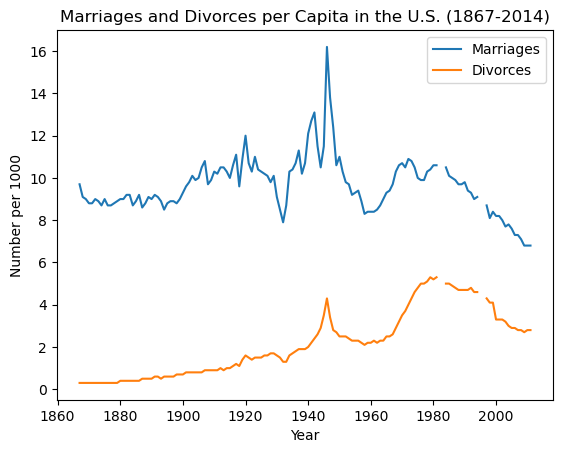

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Create the line plot
plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Question 7

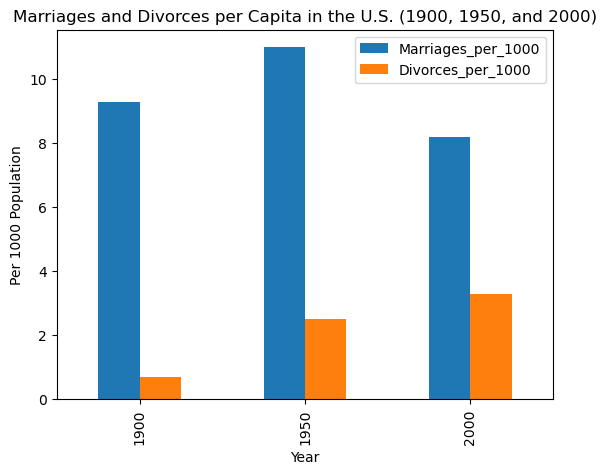

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# select the rows for 1900, 1950, and 2000
years = [1900, 1950, 2000]
df_years = df.loc[df['Year'].isin(years)]
# create a vertical bar chart
df_years.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'], kind='bar')

# set the title and axis labels
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)')
plt.xlabel('Year')
plt.ylabel('Per 1000 Population')

# show the plot
plt.show()

## Question 8

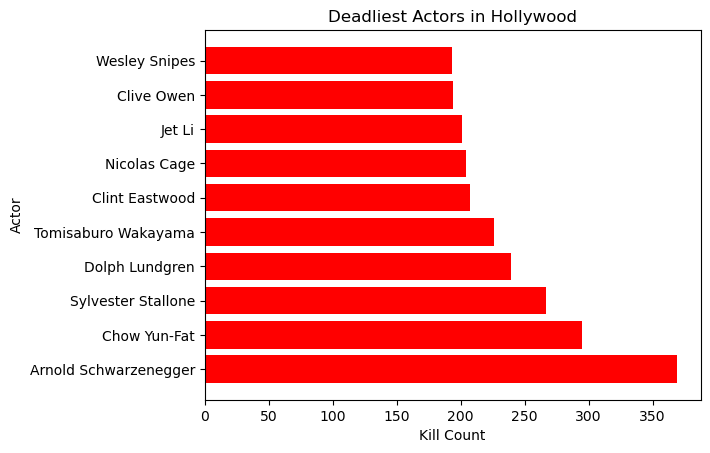

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv("actor_kill_counts.csv")

# Sort the data by count
df = df.sort_values("Count", ascending=False)

# Create horizontal bar chart
plt.barh(df["Actor"], df["Count"], color="red")

# Set labels and title
plt.xlabel("Kill Count")
plt.ylabel("Actor")
plt.title("Deadliest Actors in Hollywood")

# Show plot
plt.show()

## Question 9

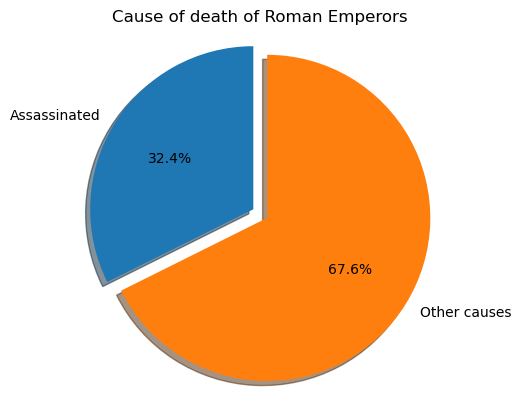

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("roman-emperor-reigns.csv")

# Count the number of emperors who were assassinated
assassinated = data["Cause_of_Death"].str.contains("Assassinated").sum()

# Count the number of emperors who died of other causes
other_causes = len(data) - assassinated

# Create a pie chart
labels = ["Assassinated", "Other causes"]
sizes = [assassinated, other_causes]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

# Add a title
ax1.set_title("Cause of death of Roman Emperors")

# Show the plot
plt.show()


## Question 10

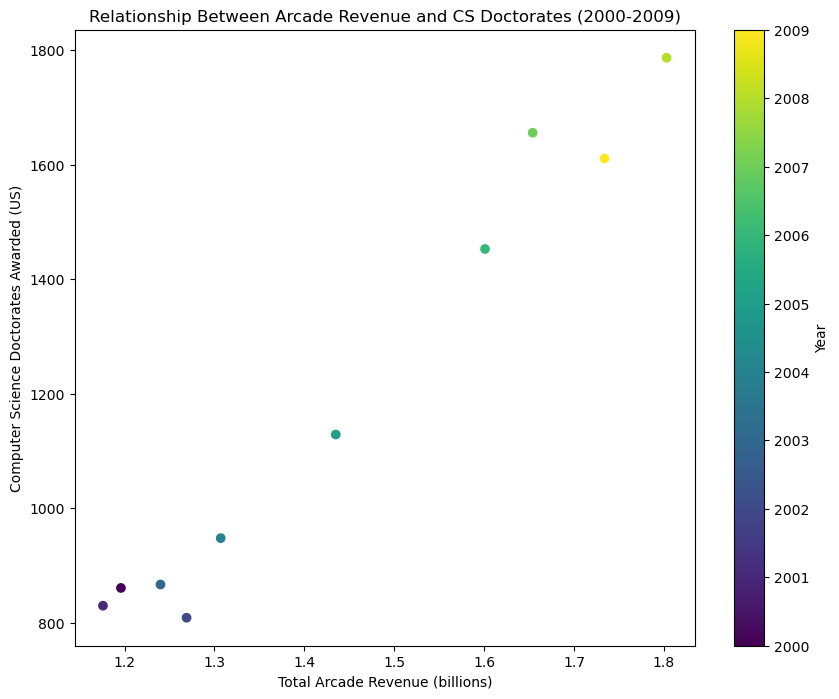

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from CSV file
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a scatter plot with revenue on the x-axis and CS PhDs on the y-axis
plt.scatter(data["Total Arcade Revenue (billions)"], data["Computer Science Doctorates Awarded (US)"], c=data["Year"])

# Add a color bar to show the years
plt.colorbar(label="Year")

# Add axis labels and a title
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.title("Relationship Between Arcade Revenue and CS Doctorates (2000-2009)")

# Display the plot
plt.show()
